In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [3]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    # df = pd.read_csv(dataset[year], chunksize=chanksize, compression='gzip')

In [4]:
file_name = "Data/[5]asteroid.zip"
read_file(file_name)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_12708/2624838877.py:2: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  read_file(file_name)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.3

In [5]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [6]:
file_name = "Data/[5]asteroid.zip"
dataset = read_file(file_name)
output_file = "результаты_5.json"
get_memory_stat_by_column(dataset, output_file)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_12708/4227185738.py:2: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  dataset = read_file(file_name)


In [7]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [8]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [9]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [10]:
converted_obj = opt_obj(dataset)

505.30 MB
183.90 MB


In [11]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [12]:
converted_int = opt_int(dataset)

14.63 MB
5.48 MB
          before   after
spkid      int64  uint32
epoch_mjd  int64  uint16


In [13]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [14]:
converted_float = opt_float(dataset)

241.33 MB
120.66 MB
                 before    after
H               float64  float32
diameter        float64  float32
albedo          float64  float32
diameter_sigma  float64  float32
epoch           float64  float32
...                 ...      ...
sigma_ad        float64  float32
sigma_n         float64  float32
sigma_tp        float64  float32
sigma_per       float64  float32
rms             float64  float32

[33 rows x 2 columns]


In [15]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

761.26 MB
310.05 MB


In [ ]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [16]:
need_column = dict()
column_names = ['spkid', 'epoch_mjd', 'H',
           'diameter', 'diameter_sigma', 'rms',
           'full_name', 'name', 'orbit_id', 'class']

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_5.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_5.csv', mode='a', header=has_header)
    has_header = False

spkid:uint32
epoch_mjd:uint16
H:float32
diameter:float32
diameter_sigma:float32
rms:float32
full_name:object
name:category
orbit_id:category
class:category
12.18 MB
12.06 MB
12.06 MB
12.06 MB
12.06 MB
12.07 MB
12.07 MB
12.06 MB
12.07 MB
7.99 MB


In [18]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_5.json")

dataset = pd.read_csv("df_5.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   spkid           958524 non-null  uint32  
 1   full_name       958524 non-null  object  
 2   name            22064 non-null   category
 3   H               952261 non-null  float32 
 4   diameter        136209 non-null  float32 
 5   diameter_sigma  136081 non-null  float32 
 6   orbit_id        958524 non-null  category
 7   epoch_mjd       958524 non-null  uint16  
 8   class           958524 non-null  category
 9   rms             958522 non-null  float32 
dtypes: category(3), float32(4), object(1), uint16(1), uint32(1)
memory usage: 96.0 MB


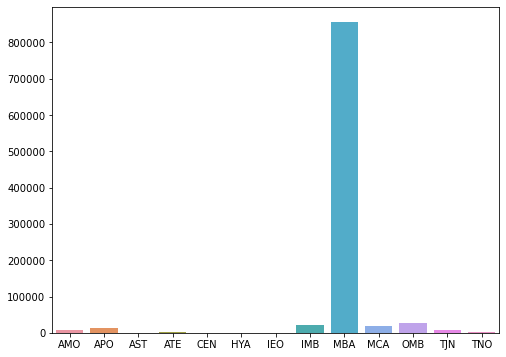

In [22]:
# График столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

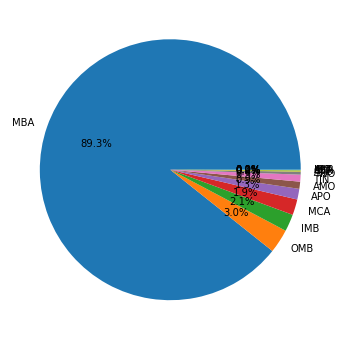

In [23]:
# График круговой диаграммы
plt.figure(figsize=(8, 6))
dataset['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('')
plt.show()

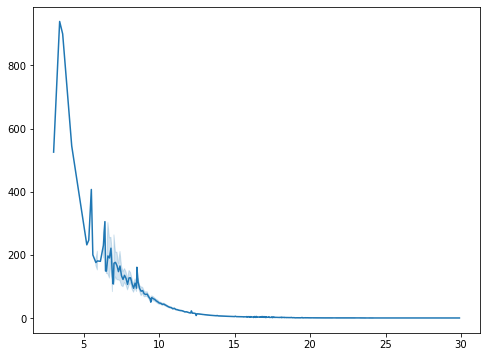

In [24]:
# Линейный график
plt.figure(figsize=(8, 6))
sns.lineplot(x='H', y='diameter', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

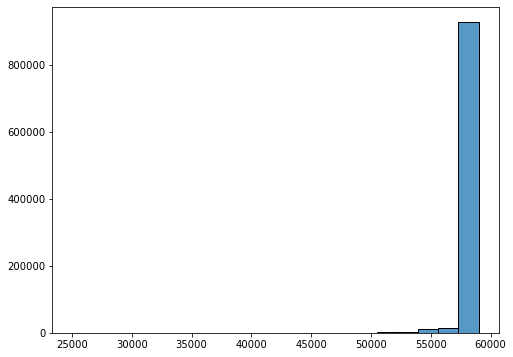

In [28]:
# Гистограмма 
plt.figure(figsize=(8, 6))
sns.histplot(dataset['epoch_mjd'], bins=20)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

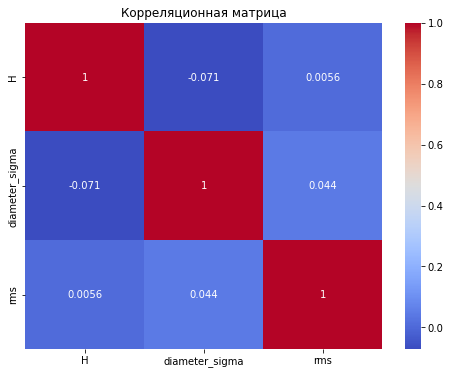

In [29]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['H', 'diameter_sigma', 'rms']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()